# Question 1
plotting out the data and determining scaling method

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation, BatchNormalization, Dropout
from keras import initializers, regularizers, optimizers, backend

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'data/Air_pollution.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)


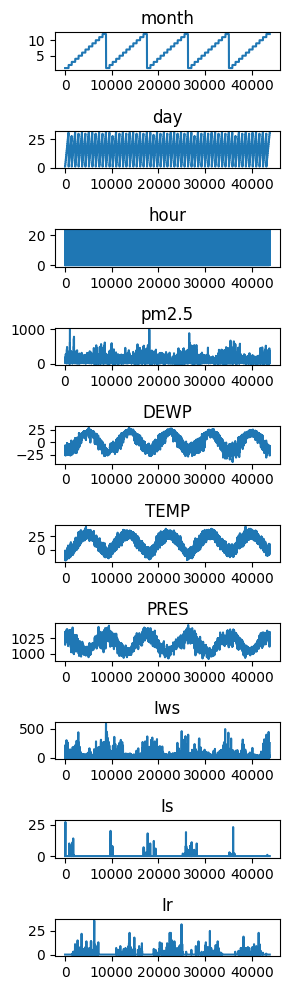

In [21]:
# taking out the nessesary data
new_df = df[['month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']]

num_subplots = len(new_df.columns)

# Create subplots using plt.subplots, adjusting the size as needed
fig, axes = plt.subplots(nrows=num_subplots, ncols=1, figsize=(3, 1*num_subplots))

# Iterate through the rows and plot each row on a separate subplot
for i, row_name in enumerate(new_df):
    ax = axes[i]  # Get the current subplot
    new_df.loc[:, row_name].plot(ax=ax)  # Plot the row on the current subplot
    ax.set_title(row_name)  # Set the title of the subplot to the row name


# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# dropping out the NaN numbers i guess
new_df = new_df.dropna()

In [23]:
# conducting statistical analysis on the data we were given
from scipy.stats import shapiro

for i, row_name in enumerate(new_df):
    # check for the shapiro value or smt
    shapiro_stat, shapiro_p = shapiro(new_df.loc[:, row_name])
    print(f'shapiro wilk test p value for {row_name} is: {shapiro_p}, and {shapiro_stat}')

    # i should probably clean out the NaN values
    temp = new_df.loc[:, row_name]

# it seems like all the p values are of 0, which is weird. I wonder if it is caused by any issue in porgramming

shapiro wilk test p value for month is: 0.0, and 0.9409165382385254
shapiro wilk test p value for day is: 0.0, and 0.9544256329536438
shapiro wilk test p value for hour is: 0.0, and 0.9508587121963501
shapiro wilk test p value for pm2.5 is: 0.0, and 0.8338834047317505
shapiro wilk test p value for DEWP is: 0.0, and 0.9516159296035767
shapiro wilk test p value for TEMP is: 0.0, and 0.9623805284500122
shapiro wilk test p value for PRES is: 0.0, and 0.9822994470596313
shapiro wilk test p value for Iws is: 0.0, and 0.48996394872665405
shapiro wilk test p value for Is is: 0.0, and 0.04464465379714966
shapiro wilk test p value for Ir is: 0.0, and 0.12107396125793457


D:\gitprojects\FinerObjectDetectionVENV\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import numpy as np

# normalization for stuff with range, standardization is for gaussian distribution, and robust scaling is for stuff that does not fit both criteria i guess

# sending them all into an array i guess
asset_input = pd.DataFrame(new_df, columns=['month', 'day', 'hour'])
x1 = asset_input.values

asset_input = pd.DataFrame(new_df, columns=['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir'])
x2 = asset_input.values

asset_input = pd.DataFrame(new_df, columns=['pm2.5'])
y = asset_input.values

# Normalization for fixed ranged
scaler_x1 = MinMaxScaler()
scaler_x1.fit(x1)
x_scale1 = scaler_x1.transform(x1)

# robust for everything else
scaler_x2 = RobustScaler()
scaler_x2.fit(x2)
x_scale2 = scaler_x2.transform(x2)

x_scale = np.concatenate((x_scale1, x_scale2), axis=1)
del x_scale2, x_scale1

# robust scaling for the dependent variable
scaler_y = RobustScaler()
scaler_y.fit(y)
y_scale = scaler_y.transform(y)

In [25]:
from sklearn.model_selection import train_test_split

# split the dataset into training and testing set now
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x_scale, y_scale, test_size=0.2, random_state=7567)

# Question 2
This is gonna take a while

In [26]:
# preparing x train dataset. Y dataset is unchanged since that is what we are predicting
train_set_list = []
default_train_set = x_train_set[:, 3:7]
train_set_list.append(default_train_set)

# concatenate the new datasets i guess
temp_slice = x_train_set[:, 0]
temp_dataset = np.concatenate((default_train_set, temp_slice[:, np.newaxis]), axis=1)     # month
train_set_list.append(temp_dataset)
temp_slice = x_train_set[:, 1]
temp_dataset = np.concatenate((default_train_set, temp_slice[:, np.newaxis]), axis=1)      # day
train_set_list.append(temp_dataset)
temp_slice = x_train_set[:, 2]
temp_dataset = np.concatenate((default_train_set, temp_slice[:, np.newaxis]), axis=1)      # hour
train_set_list.append(temp_dataset)
temp_slice = x_train_set[:, -1]
temp_dataset = np.concatenate((default_train_set, temp_slice[:, np.newaxis]), axis=1)      # ls
train_set_list.append(temp_dataset)
temp_slice = x_train_set[:, -2]
temp_dataset = np.concatenate((default_train_set, temp_slice[:, np.newaxis]), axis=1)      # lr
train_set_list.append(temp_dataset)




# preparing x test dataset. Y dataset is unchanged since that is what we are predicting
test_set_list = []
default_test_set = x_test_set[:, 3:7]
test_set_list.append(default_test_set)

# concatenate the new datasets i guess
temp_slice = x_test_set[:, 0]
temp_dataset = np.concatenate((default_test_set, temp_slice[:, np.newaxis]), axis=1)     # month
test_set_list.append(temp_dataset)
temp_slice = x_test_set[:, 1]
temp_dataset = np.concatenate((default_test_set, temp_slice[:, np.newaxis]), axis=1)      # day
test_set_list.append(temp_dataset)
temp_slice = x_test_set[:, 2]
temp_dataset = np.concatenate((default_test_set, temp_slice[:, np.newaxis]), axis=1)      # hour
test_set_list.append(temp_dataset)
temp_slice = x_test_set[:, -1]
temp_dataset = np.concatenate((default_test_set, temp_slice[:, np.newaxis]), axis=1)      # ls
test_set_list.append(temp_dataset)
temp_slice = x_test_set[:, -2]
temp_dataset = np.concatenate((default_test_set, temp_slice[:, np.newaxis]), axis=1)      # lr
test_set_list.append(temp_dataset)

This is for polynomial regression

1
2
3
4
5
6
7
8
9


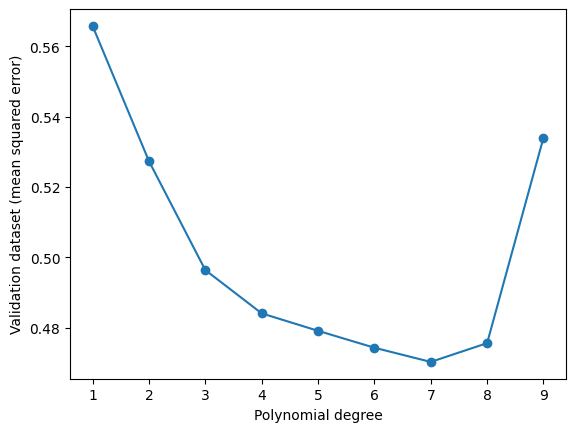

In [31]:
# searching for best hyperparameter. I am running on the assumption that the best hyperparameter will work the same for everything

mse = np.array([])
scorer = make_scorer(mean_squared_error)

temp_x_set = train_set_list[0]

n_vec = range(1,10)
for n in n_vec:
    print(n)
    poly_transformer = PolynomialFeatures(degree=n)
    x_train_poly = poly_transformer.fit_transform(temp_x_set)
    model = LinearRegression()
    score = cross_val_score(model, x_train_poly, y_train_set, cv=5, scoring=scorer)
    mse = np.append(mse, score.mean())

plt.plot(n_vec, mse, marker='o')
plt.xlabel('Polynomial degree')
plt.ylabel('Validation dataset (mean squared error)')
plt.show()

In [35]:
# the best valur from the previous 1 was 8, so that will be used
BEST_DEGREE = 7

# loop through each of the dataset
for idx in range(len(train_set_list)):
    # temporary dataset for current iteration
    temp_x_set = train_set_list[idx]
    temp_x_set_test = test_set_list[idx]

    # define polynomial regression
    poly_transformer = PolynomialFeatures(degree=BEST_DEGREE)
    x_train_poly = poly_transformer.fit_transform(temp_x_set)

    model = LinearRegression()
    model.fit(x_train_poly, y_train_set)

    # the scaled prediction, i will just use this one
    y_train_pred_scale = model.predict(x_train_poly)
    mse_train_scale = mean_squared_error(y_train_set, y_train_pred_scale)

    # print(f'{mse_train_scale}')

    # this is to grab the validation information
    x_test_poly = poly_transformer.fit_transform(temp_x_set_test)
    y_test_pred_scale = model.predict(x_test_poly)
    mse_test_scale = mean_squared_error(y_test_set, y_test_pred_scale)
    print(f'{mse_test_scale}')

0.4603025212903801
0.3369913551202421
0.4328895582228142
0.41896392897727547
16.87078558277869
37499.43617940631


This is for knn

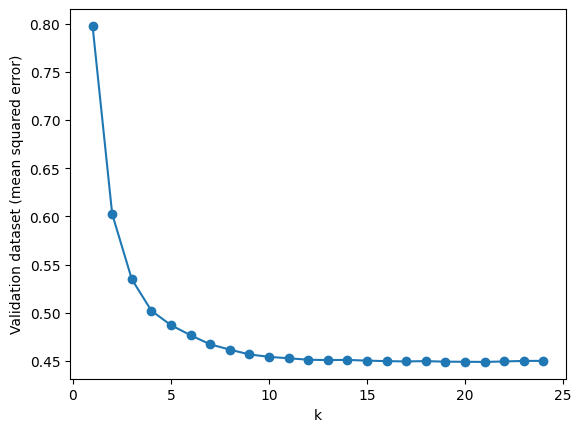

In [39]:
# hyperparameter search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

temp_x_set = train_set_list[0]

mse = np.array([])
scorer = make_scorer(mean_squared_error)

k_vec = range(1,25)
for k in k_vec:
    model = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(model, temp_x_set, y_train_set, cv=5, scoring=scorer)
    mse = np.append(mse, score.mean())

plt.plot(k_vec, mse, marker='o')
plt.xlabel('k')
plt.ylabel('Validation dataset (mean squared error)')
plt.show()

In [40]:
# the best value was around 5, so that will be used
BEST_K = 5

# loop through each of the dataset
for idx in range(len(train_set_list)):
    # temporary dataset for current iteration
    temp_x_set = train_set_list[idx]
    temp_x_set_test = test_set_list[idx]

    # Fit the model with the best hyperparameter
    model = KNeighborsRegressor(n_neighbors=BEST_K)
    model.fit(temp_x_set, y_train_set)

    # y_train_pred_scale = model.predict(x_train)
    # mse_train_scale = mean_squared_error(y_train, y_train_pred_scale)
    #
    # print("Mean squared error of the scaled training dataset :", mse_train_scale)
    # print("Mean squared error of the real training dataset (USD):", mse_train_real)

    # Predict the output
    y_test_pred_scale = model.predict(temp_x_set_test)
    mse_test_scale = mean_squared_error(y_test_set, y_test_pred_scale)

    print(f'{mse_test_scale}')

0.4932587185773825
0.33813703600231776
0.3348815496908325
0.4105567791521477
0.48962436241584284
0.48839894603167094


SVM time

100%|██████████| 10/10 [35:13<00:00, 211.37s/it]


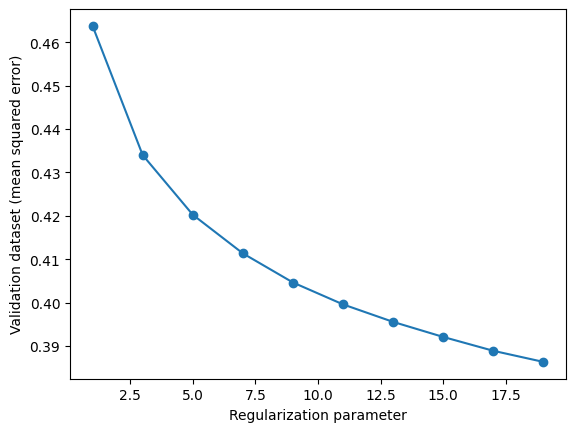

In [48]:
# Using for loop by fixing the kernel to fine-tune C
# since we are only optimizing over rbf, i dont have to grid search though everything
from tqdm import tqdm
mse = np.array([])
scorer = make_scorer(mean_squared_error)

C_vec = np.arange(1,20,2)
for c in tqdm(C_vec):
    model = SVR(kernel='rbf', C=c)
    score = cross_val_score(model, x_train_set, y_train_set.reshape(-1), cv=5, scoring=scorer)
    mse = np.append(mse, score.mean())

plt.plot(C_vec, mse, marker='o')
plt.xlabel('Regularization parameter')
plt.ylabel('Validation dataset (mean squared error)')
plt.show()

In [53]:
# Fit the model with the best hyperparameter
BEST_C = 18

for idx in range(len(train_set_list)):
    # temporary dataset for current iteration
    temp_x_set = train_set_list[idx]
    temp_x_set_test = test_set_list[idx]

    model = SVR(kernel='rbf', C=BEST_C)
    model.fit(temp_x_set, y_train_set.reshape(-1))

    # Predict the output
    y_test_pred_scale = model.predict(temp_x_set_test)
    mse_test_scale = mean_squared_error(y_test_set, y_test_pred_scale)

    print(f'{mse_test_scale}')

0.5015944361941723
0.4049171135207408
0.49141732522059434
0.4739475909620377
0.4988200120796064
0.5000976185075331


ANNs

currently at idx 0
Epoch 1/30
522/522 [==============================] - 4s 3ms/step - loss: 1.2856 - mse: 1.2011 - val_loss: 0.5930 - val_mse: 0.5206
Epoch 2/30
522/522 [==============================] - 1s 2ms/step - loss: 0.6405 - mse: 0.5797 - val_loss: 0.5539 - val_mse: 0.5040
Epoch 3/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5913 - mse: 0.5502 - val_loss: 0.5410 - val_mse: 0.5078
Epoch 4/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5629 - mse: 0.5358 - val_loss: 0.5428 - val_mse: 0.5210
Epoch 5/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5469 - mse: 0.5290 - val_loss: 0.5264 - val_mse: 0.5117
Epoch 6/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5379 - mse: 0.5257 - val_loss: 0.5172 - val_mse: 0.5070
Epoch 7/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5342 - mse: 0.5251 - val_loss: 0.5025 - val_mse: 0.4943
Epoch 8/30
522/522 [==============================] - 1s 

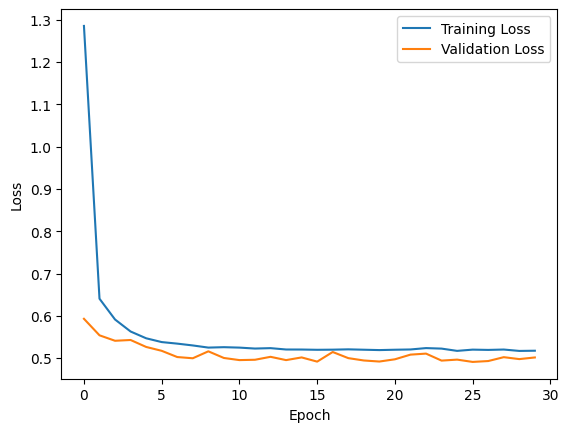

currently at idx 1
Epoch 1/30
522/522 [==============================] - 3s 3ms/step - loss: 1.1786 - mse: 1.0774 - val_loss: 0.6265 - val_mse: 0.5425
Epoch 2/30
522/522 [==============================] - 2s 3ms/step - loss: 0.6046 - mse: 0.5352 - val_loss: 0.5100 - val_mse: 0.4535
Epoch 3/30
522/522 [==============================] - 2s 4ms/step - loss: 0.5483 - mse: 0.5015 - val_loss: 0.4992 - val_mse: 0.4608
Epoch 4/30
522/522 [==============================] - 2s 4ms/step - loss: 0.5159 - mse: 0.4837 - val_loss: 0.4710 - val_mse: 0.4441
Epoch 5/30
522/522 [==============================] - 1s 3ms/step - loss: 0.4969 - mse: 0.4730 - val_loss: 0.4594 - val_mse: 0.4381
Epoch 6/30
522/522 [==============================] - 1s 3ms/step - loss: 0.4847 - mse: 0.4653 - val_loss: 0.4449 - val_mse: 0.4266
Epoch 7/30
522/522 [==============================] - 1s 2ms/step - loss: 0.4784 - mse: 0.4611 - val_loss: 0.4322 - val_mse: 0.4155
Epoch 8/30
522/522 [==============================] - 1s 

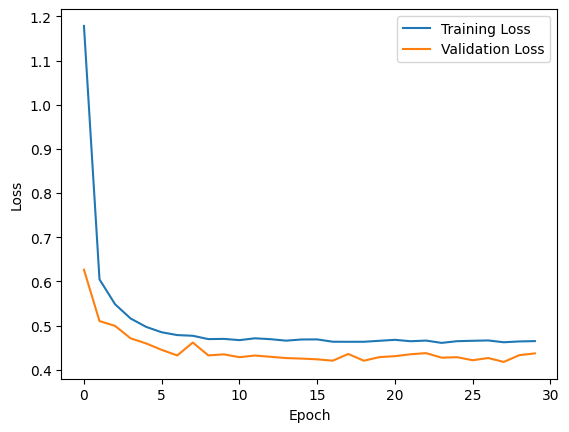

currently at idx 2
Epoch 1/30
522/522 [==============================] - 2s 2ms/step - loss: 1.2080 - mse: 1.1097 - val_loss: 0.6028 - val_mse: 0.5238
Epoch 2/30
522/522 [==============================] - 1s 2ms/step - loss: 0.6427 - mse: 0.5791 - val_loss: 0.6500 - val_mse: 0.6001
Epoch 3/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5867 - mse: 0.5468 - val_loss: 0.5252 - val_mse: 0.4940
Epoch 4/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5568 - mse: 0.5317 - val_loss: 0.5240 - val_mse: 0.5040
Epoch 5/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5384 - mse: 0.5220 - val_loss: 0.5045 - val_mse: 0.4910
Epoch 6/30
522/522 [==============================] - 1s 3ms/step - loss: 0.5343 - mse: 0.5228 - val_loss: 0.5123 - val_mse: 0.5023
Epoch 7/30
522/522 [==============================] - 1s 3ms/step - loss: 0.5250 - mse: 0.5158 - val_loss: 0.5329 - val_mse: 0.5244
Epoch 8/30
522/522 [==============================] - 1s 

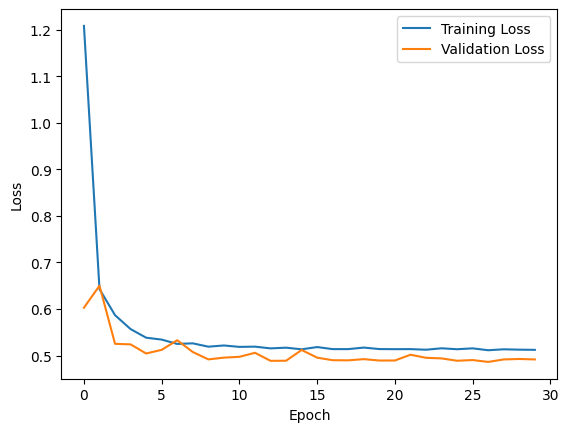

currently at idx 3
Epoch 1/30
522/522 [==============================] - 2s 3ms/step - loss: 1.2289 - mse: 1.1283 - val_loss: 0.5897 - val_mse: 0.5071
Epoch 2/30
522/522 [==============================] - 1s 2ms/step - loss: 0.6335 - mse: 0.5660 - val_loss: 0.5598 - val_mse: 0.5056
Epoch 3/30
522/522 [==============================] - 2s 3ms/step - loss: 0.5774 - mse: 0.5335 - val_loss: 0.5394 - val_mse: 0.5044
Epoch 4/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5502 - mse: 0.5215 - val_loss: 0.5112 - val_mse: 0.4882
Epoch 5/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5352 - mse: 0.5161 - val_loss: 0.4958 - val_mse: 0.4802
Epoch 6/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5229 - mse: 0.5093 - val_loss: 0.4988 - val_mse: 0.4867
Epoch 7/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5216 - mse: 0.5107 - val_loss: 0.4913 - val_mse: 0.4811
Epoch 8/30
522/522 [==============================] - 1s 

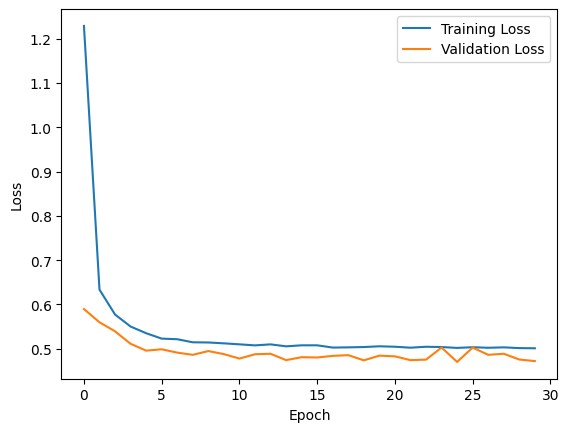

currently at idx 4
Epoch 1/30
522/522 [==============================] - 2s 2ms/step - loss: 1.1249 - mse: 1.0220 - val_loss: 0.6469 - val_mse: 0.5617
Epoch 2/30
522/522 [==============================] - 1s 2ms/step - loss: 0.6430 - mse: 0.5734 - val_loss: 0.5680 - val_mse: 0.5129
Epoch 3/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5882 - mse: 0.5439 - val_loss: 0.5332 - val_mse: 0.4988
Epoch 4/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5541 - mse: 0.5269 - val_loss: 0.5454 - val_mse: 0.5245
Epoch 5/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5390 - mse: 0.5221 - val_loss: 0.5189 - val_mse: 0.5052
Epoch 6/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5344 - mse: 0.5228 - val_loss: 0.5083 - val_mse: 0.4985
Epoch 7/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5268 - mse: 0.5178 - val_loss: 0.5223 - val_mse: 0.5143
Epoch 8/30
522/522 [==============================] - 1s 

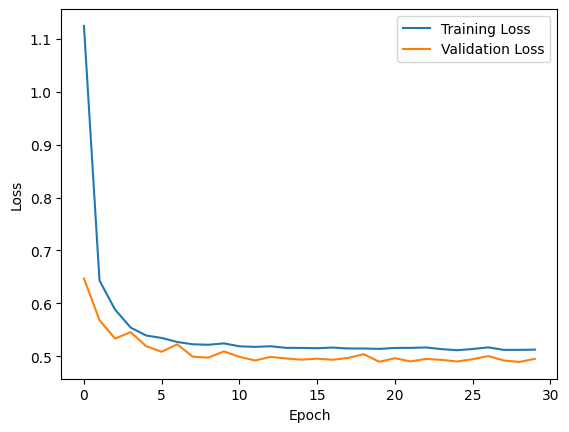

currently at idx 5
Epoch 1/30
522/522 [==============================] - 2s 2ms/step - loss: 1.2439 - mse: 1.1434 - val_loss: 0.6928 - val_mse: 0.6088
Epoch 2/30
522/522 [==============================] - 1s 2ms/step - loss: 0.6580 - mse: 0.5888 - val_loss: 0.5644 - val_mse: 0.5086
Epoch 3/30
522/522 [==============================] - 1s 2ms/step - loss: 0.6001 - mse: 0.5551 - val_loss: 0.5560 - val_mse: 0.5207
Epoch 4/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5695 - mse: 0.5410 - val_loss: 0.5283 - val_mse: 0.5057
Epoch 5/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5508 - mse: 0.5326 - val_loss: 0.5171 - val_mse: 0.5027
Epoch 6/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5425 - mse: 0.5301 - val_loss: 0.5176 - val_mse: 0.5072
Epoch 7/30
522/522 [==============================] - 1s 2ms/step - loss: 0.5336 - mse: 0.5241 - val_loss: 0.5215 - val_mse: 0.5128
Epoch 8/30
522/522 [==============================] - 1s 

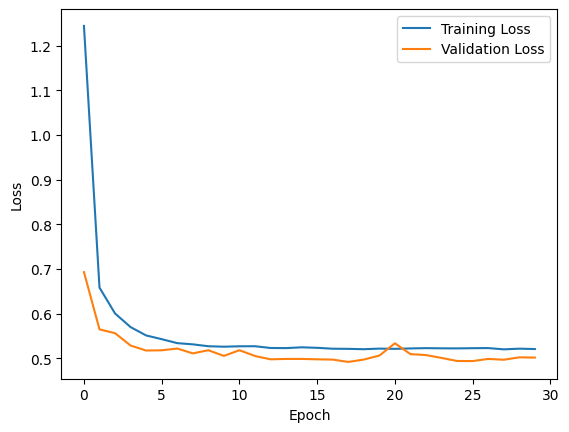

0.4923610544504155
0.41880319295748714
0.481739316501459
0.45906621845476125
0.48555193161396004
0.4917273104526998


In [52]:
# this is gonna be a damn long running session
mse_list = []

# loop through each of the dataset
for idx in range(len(train_set_list)):
    print(f'currently at idx {idx}')
    # temporary dataset for current iteration
    temp_x_set = train_set_list[idx]
    temp_x_set_test = test_set_list[idx]

    backend.clear_session()
    init_weight = initializers.GlorotUniform(seed=0)
    regu_weight = regularizers.l2(0.01)

    # this one just resets the model variable, idk how it works here
    del model

    model = Sequential()
    # this if statement is because they have different input values i guess
    if idx == 0:
        model.add(Dense(1000, input_shape=(4,), kernel_initializer=init_weight, kernel_regularizer=regu_weight))
    else:
        model.add(Dense(1000, input_shape=(5,), kernel_initializer=init_weight, kernel_regularizer=regu_weight))
    model.add(BatchNormalization())
    model.add(Activation('ReLU'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer=init_weight, kernel_regularizer=regu_weight))

    my_optmz = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=my_optmz, loss='mean_squared_error', metrics='mse')
    model_hist = model.fit(temp_x_set, y_train_set, epochs=30, batch_size=64, validation_data=(temp_x_set_test,y_test_set), verbose=1)

    plt.figure()
    plt.plot(model_hist.history['loss'], label='Training Loss')
    plt.plot(model_hist.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # compiling the mean square error as well i guess
    y_test_pred_scale = model.predict(temp_x_set_test, verbose=0)
    mse_test_scale = mean_squared_error(y_test_set, y_test_pred_scale)
    mse_list.append(mse_test_scale)
for item in mse_list:
    print(f'{item}')

# question 3

In [ ]:
# cleaning out the NaNs

# splitting 10% of the most recent data as the testing data.

# 90% remaining split into train and validation according to last 4 student id

# apply scaling methods and prepare accordingly for time series data

anns

rnns

gated recueent unit networks

 lstm memory networks